# **Исследовательская работа: *''Изучение взаимодействий между дельфинами в популяции Даутфул-Саундского пролива"***

***Подготовка данных и инструментов:***

In [ ]:
# Загружаем библиотеки и файлы
from google.colab import files
import pandas as pd

dolphins_ds = pd.read_csv('/content/dolphins.csv')
dolphins_names=pd.read_csv('/content/dolphins2.csv')

print(dolphins_ds)
print(dolphins_names)

     Source  Target        Type   Id  Label  Weight
0         8       3  Undirected  159    NaN       1
1         9       5  Undirected  160    NaN       1
2         9       6  Undirected  161    NaN       1
3        10       0  Undirected  162    NaN       1
4        10       2  Undirected  163    NaN       1
..      ...     ...         ...  ...    ...     ...
154      59      45  Undirected  313    NaN       1
155      60      32  Undirected  314    NaN       1
156      61       2  Undirected  315    NaN       1
157      61      37  Undirected  316    NaN       1
158      61      53  Undirected  317    NaN       1

[159 rows x 6 columns]
    Id       Label
0    0        Beak
1    1  Beescratch
2    2      Bumper
3    3         CCL
4    4       Cross
..  ..         ...
57  57         Web
58  58    Whitetip
59  59         Zap
60  60         Zig
61  61      Zipfel

[62 rows x 2 columns]


In [ ]:
# Загружаем библиотеки для графов и графиков
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import functools

In [ ]:
# Делим на столбцы, чтобы проще считать центральности было.
inD=dolphins_ds.iloc[:,1].values
outD=dolphins_ds.iloc[:,0].values
names=dolphins_names.iloc[:,1].values
id=dolphins_names.iloc[:,0].values
edges=list(zip(outD, inD))

print(inD)
print(outD)
print(names)
print(id)
print(edges)

[ 3  5  6  0  2  5  6  9  0  3  0 14  1  6  9 13 15  1  7  8 16 18 18 17
 14 15 18 17  1 25  1  7 17 25 26  1  8 20 10 18 21 24  7 19 28 17  9 13
 12 14 16 21 14 33 29  1 20 23  8 14 16 21 33 34 36 14 16 20 33 36  0  7
 14 15 33 36 37  1  9 13  0  2 10 30 14 29 33 37 38  2 20 34 38  8 15 18
 21 23 24 29 37 43  0 10 20 28 30 42 34 46 14 16 20 33 42 45  4 11 18 21
 23 24 29 45 50 14 29 38 40 43  1  6  7 13 19 41 15 51  5  6  5  6  9 13
 17 39 41 48 54 38  3  8 15 36 45 32  2 37 53]
[ 8  9  9 10 10 13 13 13 14 14 15 16 17 17 17 17 18 19 19 20 20 20 21 22
 24 24 24 25 26 26 27 27 27 27 27 28 28 28 29 29 29 29 30 30 30 31 32 32
 33 33 33 33 34 34 35 36 36 36 37 37 37 37 37 37 37 38 38 38 38 39 40 40
 40 40 40 40 40 41 41 41 42 42 42 42 43 43 43 43 43 44 44 44 44 45 45 45
 45 45 45 45 45 46 47 47 47 47 47 47 49 49 50 50 50 50 50 50 51 51 51 51
 51 51 51 51 51 52 52 52 52 53 54 54 54 54 54 54 55 55 56 56 57 57 57 57
 57 57 57 57 57 58 59 59 59 59 59 60 61 61 61]
['Beak' 'Beescratch' 'Bumper' 

***Степенная центральность:***

In [ ]:
# Рассчитываем центральность по степени
# Лист, где будет находится оценка коэффициента узлов по всей центральности
degree_list=[0]*len(names)

# Подсчет коэффициентов центральности:
for i in range(0, len(inD)):
  degree_list[inD[i]]+=1
  degree_list[outD[i]]+=1

for j in range(0, len(names)):
  print(degree_list[j], names[j])



6 Beak
8 Beescratch
4 Bumper
3 CCL
1 Cross
4 DN16
6 DN21
5 DN63
6 Double
7 Feather
5 Fish
1 Five
1 Fork
8 Gallatin
12 Grin
7 Haecksel
6 Hook
9 Jet
7 Jonah
4 Knit
9 Kringel
6 MN105
1 MN23
3 MN60
6 MN83
3 Mus
3 Notch
5 Number1
5 Oscar
9 Patchback
5 PL
1 Quasi
3 Ripplefluke
10 Scabs
5 Shmuddel
1 SMN5
7 SN100
11 SN4
8 SN63
2 SN89
8 SN9
5 SN90
6 SN96
7 Stripes
4 Thumper
11 Topless
2 TR120
6 TR77
1 TR82
2 TR88
7 TR99
10 Trigger
4 TSN103
2 TSN83
7 Upbang
2 Vau
2 Wave
9 Web
1 Whitetip
5 Zap
1 Zig
3 Zipfel


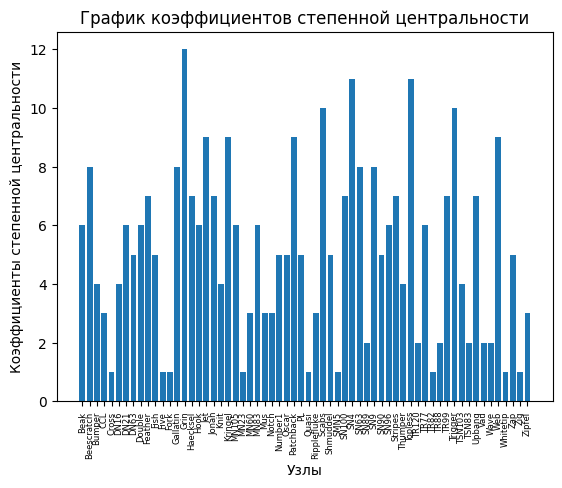

In [ ]:
# Строим график, чтобы визуализировать полученный результат
plt.bar(names, degree_list)
plt.xlabel('Узлы')
plt.ylabel('Коэффициенты степенной центральности')
plt.title('График коэффициентов степенной центральности')
plt.xticks(rotation=90, fontsize=6)  # Устанавливаем угол и размер шрифта
plt.show()

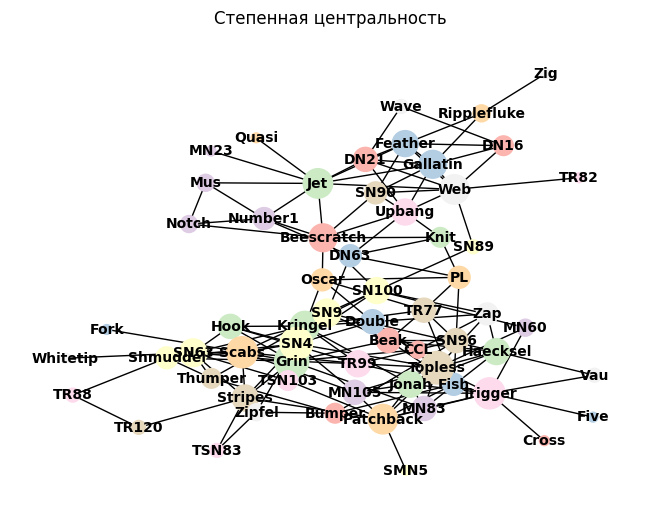

In [ ]:
# Создаем граф для этой центральности
G = nx.Graph()

# Добавляем вершины и называем их именами дельфинов
node_names = dict(zip(id, names))
G.add_nodes_from(node_names.keys())

# Добавляем рёбра (edges)
G.add_edges_from(edges)

# Рассчитываем веса вершин на основе коэффициентов степенной центральности
node_weights = [degree_list[node] for node in G.nodes()]

# Генерируем уникальные цвета для каждой вершины
colors = np.arange(len(G.nodes()))

# Рисуем граф, настраивая размер вершин, цвета и размещение
pos = nx.kamada_kawai_layout(G)  # Используем Kamada-Kawai для размещения вершин
nx.draw(G, pos, labels=node_names, with_labels=True, node_size=[w * 50 for w in node_weights], node_color=colors, cmap=plt.get_cmap("Pastel1"), font_size=10, font_color='black', font_weight='bold')
plt.title("Степенная центральность")
plt.show()

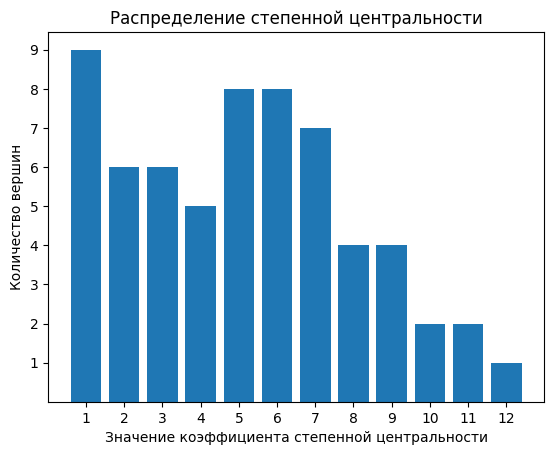

In [ ]:
# Строим график распределения для степенной центральности
degree_count = Counter(degree_list)

# Извлекаем уникальные значения и их соответствующие количества
unique_degrees, counts = zip(*degree_count.items())

# Построение графика
plt.bar(unique_degrees, counts)
plt.xlabel('Значение коэффициента степенной центральности')
plt.ylabel('Количество вершин')
plt.title('Распределение степенной центральности')

# Настройка шкалы с делениями через одно
xticks = range(min(unique_degrees), max(unique_degrees)+1)
plt.xticks(xticks)
yticks = range(min(unique_degrees), max(counts)+1)
plt.yticks(yticks)

plt.show()

***Центральность по близости***

In [ ]:
# Функция подсчета коэффициентов центральности
def closeness_centrality(G, u=None, dist=None, normalized=True):
    if dist:
        # Считаем Дэикстрой
        path_length = functools.partial(nx.single_source_dijkstra_path_length,
                                        weight=dist)
    else:
        path_length = nx.single_source_shortest_path_length

    nodes = G.nodes() if not u else [u]
    closeness_centrality = {}

    for n in nodes:
        sp = path_length(G, n)
        totsp = sum(sp.values())
        if totsp > 0.0 and len(G) > 1:
            closeness_centrality[n] = (len(sp) - 1.0) / totsp

            # Нормазизация номера вершины
            if normalized:
                s = (len(sp) - 1.0) / (len(G) - 1)
                closeness_centrality[n] *= s
        else:
            closeness_centrality[n] = 0.0

    return closeness_centrality[u] if u else closeness_centrality

In [ ]:
# Выводим результат:
c=closeness_centrality(G)
for j in range(0, len(names)):
  print(c[j], names[j])

0.3465909090909091 Beak
0.3719512195121951 Beescratch
0.2824074074074074 Bumper
0.30808080808080807 CCL
0.24897959183673468 Cross
0.23828125 DN16
0.2675438596491228 DN21
0.3652694610778443 DN63
0.3630952380952381 Double
0.25206611570247933 Feather
0.3128205128205128 Fish
0.24897959183673468 Five
0.2687224669603524 Fork
0.27111111111111114 Gallatin
0.3765432098765432 Grin
0.3388888888888889 Haecksel
0.32972972972972975 Hook
0.3096446700507614 Jet
0.3370165745856354 Jonah
0.3160621761658031 Knit
0.391025641025641 Kringel
0.3333333333333333 MN105
0.23735408560311283 MN23
0.3333333333333333 MN60
0.3128205128205128 MN83
0.25523012552301255 Mus
0.2772727272727273 Notch
0.3160621761658031 Number1
0.3652694610778443 Oscar
0.32275132275132273 Patchback
0.32275132275132273 PL
0.23735408560311283 Quasi
0.21631205673758866 Ripplefluke
0.3652694610778443 Scabs
0.3160621761658031 Shmuddel
0.24497991967871485 SMN5
0.4178082191780822 SN100
0.39869281045751637 SN4
0.32972972972972975 SN63
0.33516483516

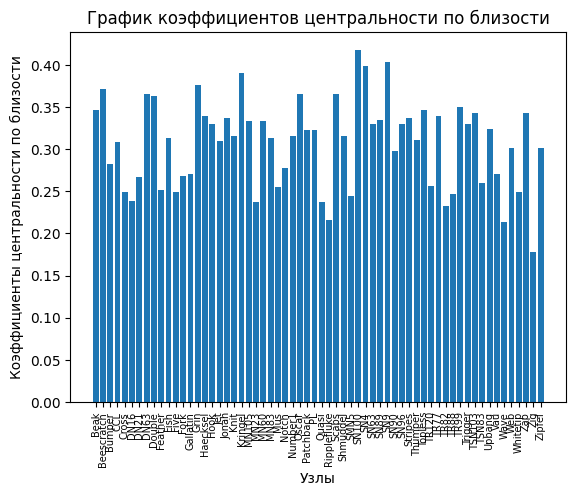

In [ ]:
# Строим график, чтобы визуализировать полученный результат
# Извлекаем уникальные значения и их соответствующие количества
unique_kof, counts = zip(*c.items())

# Построение графика
plt.bar(names, counts)
plt.xlabel('Узлы')
plt.ylabel('Коэффициенты центральности по близости')
plt.title('График коэффициентов центральности по близости')
plt.xticks(rotation=90, fontsize=7)  # Устанавливаем угол и размер шрифта
plt.show()

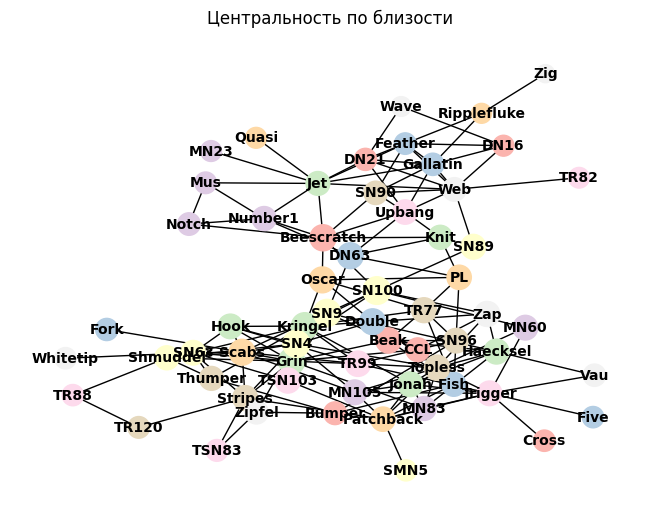

In [ ]:
# Рассчитываем веса вершин на основе коэффициентов центральности по близости
node_weights = [c[node] for node in G.nodes()]

# Генерируем уникальные цвета для каждой вершины
colors = np.arange(len(G.nodes()))

# Рисуем граф, настраивая размер вершин, цвета и размещение
pos = nx.kamada_kawai_layout(G)  # Используем Kamada-Kawai для размещения вершин
nx.draw(G, pos, labels=node_names, with_labels=True, node_size=[w * 950 for w in node_weights], node_color=colors, cmap=plt.get_cmap("Pastel1"), font_size=10, font_color='black', font_weight='bold')
plt.title("Центральность по близости")
plt.show()

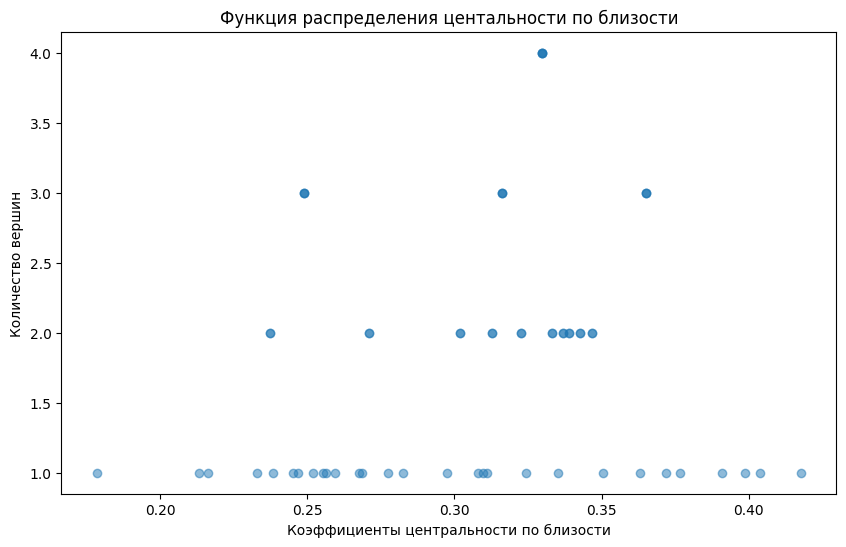

In [ ]:
# Строим график распределения для центральности по близости
# Получаем координаты для точечной диаграммы
x = list(c.values())
y = [list(c.values()).count(val) for val in x]

# Строим точечную диаграмму
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Коэффициенты центральности по близости')
plt.ylabel('Количество вершин')
plt.title('Функция распределения центальности по близости')
plt.show()

***Гармоническая центральность по близости***

In [ ]:
# Функция подсчета коэффициентов центральности
def harmonic_closeness_centrality(G, node):
    total = 0
    for target in G.nodes():
        if target != node:
            try:
                total += 1 / nx.shortest_path_length(G, source=node, target=target)
            except nx.NetworkXNoPath:
                total += 0  # Если нет такого пути не меняем счетчик
    return total / (len(G) - 1)  # Нормализуем по количеству вершин

# Снова создаем граф
G = nx.Graph()
G.add_edges_from(edges)
harm=[]

# Вывод коэффициентов
for j in range(0, len(names)):
  node_of_interest = j
  centrality = harmonic_closeness_centrality(G, node_of_interest)
  harm.append(centrality)

  print(names[j], centrality)


Beak 0.4259562841530053
Beescratch 0.4486338797814206
Bumper 0.3504293520686963
CCL 0.36873536299765797
Cross 0.29361826697892274
DN16 0.3056206088992972
DN21 0.35683060109289616
DN63 0.4218579234972676
Double 0.43524590163934407
Feather 0.3515222482435597
Fish 0.39277907884465246
Five 0.29361826697892274
Fork 0.3094457455113193
Gallatin 0.37595628415300547
Grin 0.49426229508196706
Haecksel 0.4232240437158469
Hook 0.4165495706479312
Jet 0.4117486338797812
Jonah 0.43294301327088197
Knit 0.3726775956284151
Kringel 0.47923497267759546
MN105 0.4220140515222481
MN23 0.2791178766588601
MN60 0.38224043715846995
MN83 0.41053864168618254
Mus 0.3117486338797813
Notch 0.32486338797814196
Number1 0.3822404371584698
Oscar 0.42404371584699446
Patchback 0.441959406713505
PL 0.38142076502732225
Quasi 0.2791178766588601
Ripplefluke 0.2784153005464479
Scabs 0.46967213114754086
Shmuddel 0.3946916471506634
SMN5 0.29439890710382516
SN100 0.48005464480874305
SN4 0.49836065573770477
SN63 0.43021077283372355


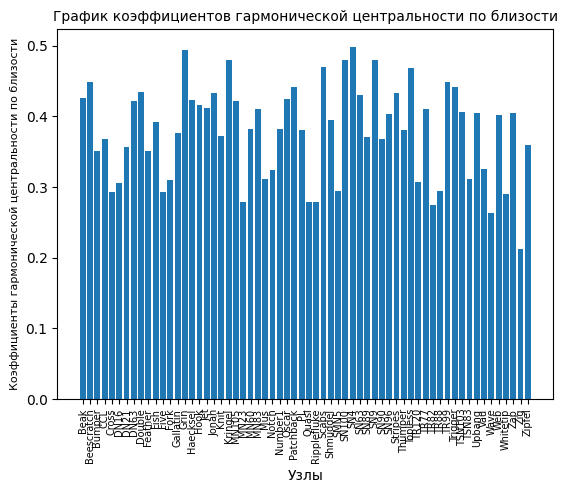

In [ ]:
# Строим график, чтобы визуализировать полученный результат

# Построение графика
plt.bar(names, harm)
plt.xlabel('Узлы')
plt.ylabel('Коэффициенты гармонической центральности по близости', fontsize=8)
plt.title('График коэффициентов гармонической центральности по близости', fontsize=10)
plt.xticks(rotation=90, fontsize=7)  # Устанавливаем угол и размер шрифта
plt.show()

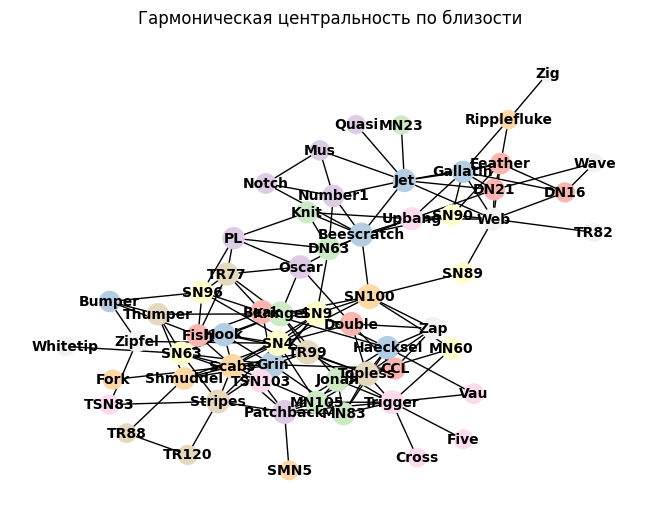

In [ ]:
# Рассчитываем веса вершин на основе коэффициентов гармонической центральности по близости
node_weights = [harm[node] for node in G.nodes()]

# Генерируем уникальные цвета для каждой вершины
colors = np.arange(len(G.nodes()))

# Рисуем граф, настраивая размер вершин, цвета и размещение
pos = nx.kamada_kawai_layout(G)  # Используем Kamada-Kawai для размещения вершин
nx.draw(G, pos, labels=node_names, with_labels=True, node_size=[w * 600 for w in node_weights], node_color=colors, cmap=plt.get_cmap("Pastel1"), font_size=10, font_color='black', font_weight='bold')
plt.title("Гармоническая центральность по близости")
plt.show()

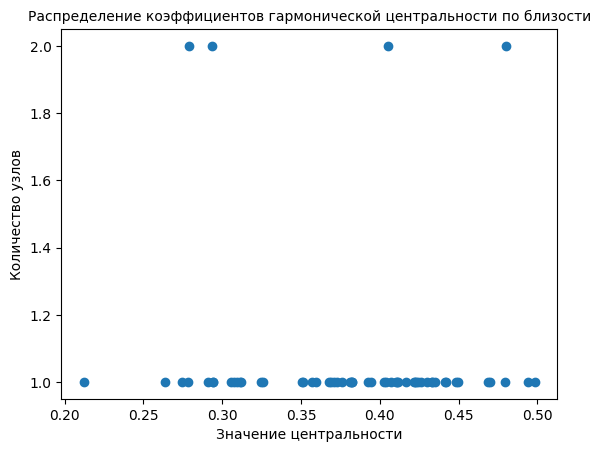

In [ ]:
# Строим график распределения для гармонической центральности по близости
# Создаем гистограмму значений центральности
counter = Counter(harm)
x = list(counter.keys())
y = list(counter.values())

plt.scatter(x, y)
plt.xlabel('Значение центральности')
plt.ylabel('Количество узлов')
plt.title('Распределение коэффициентов гармонической центральности по близости', fontsize=10)
plt.show()

***Центральность по посредничеству***

In [ ]:
#Создаем функцию подсчета коэффициентов центральности по посредничеству
def betweenness_centrality(graph):
    nodes = graph.nodes()
    betweenness = {node: 0.0 for node in nodes}
    for node in nodes:
        stack = []
        paths = {v: [] for v in nodes}
        sigma = {v: 0 for v in nodes}
        sigma[node] = 1
        distances = {v: -1 for v in nodes}
        distances[node] = 0

        queue = [node]
        while queue:
            current_node = queue.pop(0)
            stack.append(current_node)
            for neighbor in graph.neighbors(current_node):
                if distances[neighbor] < 0:
                    queue.append(neighbor)
                    distances[neighbor] = distances[current_node] + 1
                if distances[neighbor] == distances[current_node] + 1:
                    sigma[neighbor] += sigma[current_node]
                    paths[neighbor].append(current_node)

        deltas = {v: 0 for v in nodes}
        while stack:
            current_node = stack.pop()
            for predecessor in paths[current_node]:
                deltas[predecessor] += (sigma[predecessor] / sigma[current_node]) * (1 + deltas[current_node])
            if current_node != node:
                betweenness[current_node] += deltas[current_node]
    return betweenness

res=[]
# Выводим результат
c=betweenness_centrality(G)
for j in range(0, len(names)):
  res.append(c[j]/2)
  c[j]=c[j]/2
  print(c[j], names[j]) #Тут мы нормализуем, чтобы коэффициенты точно не выходили за 1000

34.92115107115108 Beak
390.38371702504406 Beescratch
16.60324675324675 Bumper
4.344047619047619 CCL
0.0 Cross
8.015949328449329 DN16
53.75174224826663 DN21
216.37667326297165 DN63
40.9292998050889 Double
38.23671606171606 Feather
29.448398268398275 Fish
0.0 Five
0.0 Fork
96.70878104280547 Gallatin
113.40876887340302 Grin
60.92476439748677 Haecksel
6.0476190476190474 Hook
209.1692981353096 Jet
27.184466482027464 Jonah
24.365341325341323 Knit
187.8417036892647 Kringel
23.24219669219669 MN105
0.0 MN23
77.19449771892381 MN60
13.510969585969585 MN83
3.0087301587301587 Mus
7.9833333333333325 Notch
53.50345470247911 Number1
122.16522703504049 Oscar
119.91858696858701 Patchback
60.48234321234322 PL
0.0 Quasi
60.0 Ripplefluke
104.6145854145854 Scabs
59.83141025641026 Shmuddel
0.0 SMN5
454.2740687329566 SN100
253.58271324522764 SN4
82.99459706959706 SN63
129.0457047280792 SN89
261.96361856699 SN9
42.5504292264407 SN90
53.35905205905206 SN96
114.98000610500611 Stripes
22.029184704184704 Thumper
7

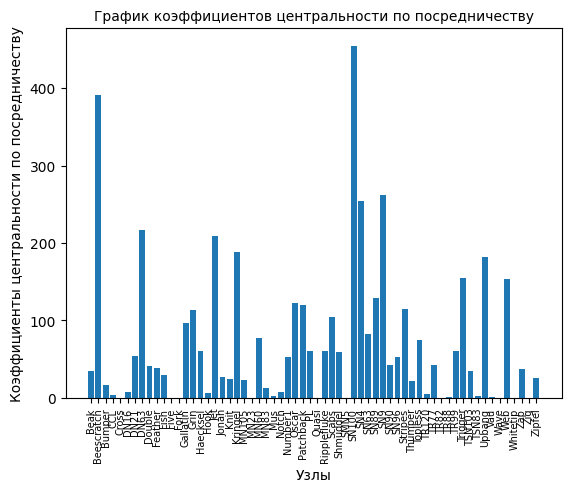

In [ ]:
# Строим график, чтобы визуализировать полученный результат

# Построение графика
plt.bar(names, res)
plt.xlabel('Узлы')
plt.ylabel('Коэффициенты центральности по посредничеству', fontsize=10)
plt.title('График коэффициентов центральности по посредничеству', fontsize=10)
plt.xticks(rotation=90, fontsize=7)  # Устанавливаем угол и размер шрифта
plt.show()

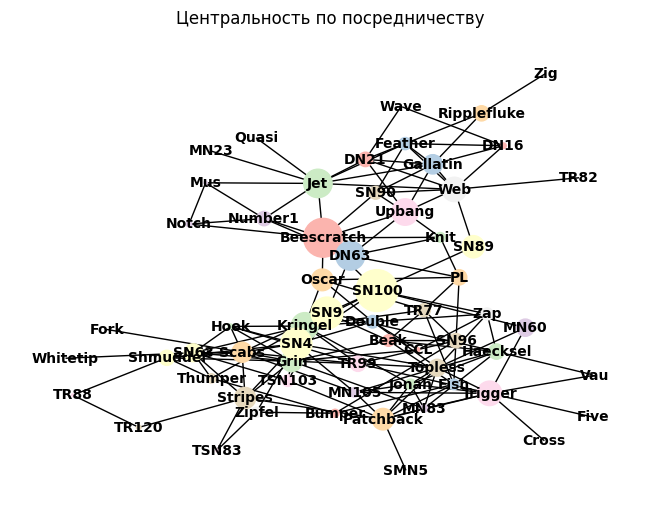

In [ ]:
# Рассчитываем веса вершин на основе коэффициентов центральности по посредничеству
node_weights = [res[node] for node in G.nodes()]

# Генерируем уникальные цвета для каждой вершины
colors = np.arange(len(G.nodes()))

# Рисуем граф, настраивая размер вершин, цвета и размещение
pos = nx.kamada_kawai_layout(G)  # Используем Kamada-Kawai для размещения вершин
nx.draw(G, pos, labels=node_names, with_labels=True, node_size=[w * 2 for w in node_weights], node_color=colors, cmap=plt.get_cmap("Pastel1"), font_size=10, font_color='black', font_weight='bold')
plt.title("Центральность по посредничеству")
plt.show()

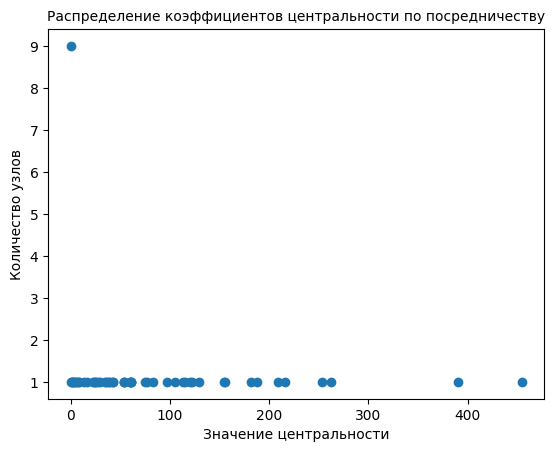

In [ ]:
# Строим график распределения центральности по посредничеству
# Создаем гистограмму значений центральности
counter = Counter(res)
x = list(counter.keys())
y = list(counter.values())

plt.scatter(x, y)
plt.xlabel('Значение центральности')
plt.ylabel('Количество узлов')
plt.title('Распределение коэффициентов центральности по посредничеству', fontsize=10)
plt.show()

***Pageranks центральность***

In [ ]:
#Создаем функцию подсчета коэффициентов центральности pageranks
def calculate_pagerank(edges, damping=0.85, epsilon=1.0e-8, max_iterations=100):
    # Подсчет уникальных вершин
    unique_nodes = set()
    for edge in edges:
        unique_nodes.update(edge)

    num_nodes = len(unique_nodes)
    node_to_index = {node: index for index, node in enumerate(unique_nodes)}

    # Создаем транзитивную матрицу
    transition_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    out_degree = [0] * num_nodes

    for edge in edges:
        from_node, to_node = edge
        from_index, to_index = node_to_index[from_node], node_to_index[to_node]
        transition_matrix[to_index][from_index] = 1
        out_degree[from_index] += 1

    for from_index in range(num_nodes):
        for to_index in range(num_nodes):
            if out_degree[from_index] != 0:
                transition_matrix[to_index][from_index] /= out_degree[from_index]

    # Указываем коэффициенты PageRank
    pagerank = [1 / num_nodes] * num_nodes
    new_pagerank = [0] * num_nodes

    # PageRank
    for _ in range(max_iterations):
        diff = 0
        for i in range(num_nodes):
            new_pagerank[i] = (1 - damping) / num_nodes
            for j in range(num_nodes):
                new_pagerank[i] += damping * pagerank[j] * transition_matrix[i][j]
            diff += abs(new_pagerank[i] - pagerank[i])

        if diff < epsilon:
            break

        pagerank = new_pagerank[:]

    # Присуждаем коэффициенты узлам
    scores = {node: pagerank[node_to_index[node]] for node in unique_nodes}
    return scores

res=[]
pagerank_scores = calculate_pagerank(edges)
for j in range(0, len(names)):
  res.append(pagerank_scores[j]/2)
  pagerank_scores[j]=pagerank_scores[j]/2
  print(pagerank_scores[j], names[j])

0.01478232439917273 Beak
0.005948140933953999 Beescratch
0.0031918627985718434 Bumper
0.008659104657949737 CCL
0.0013724798387096777 Cross
0.0050875500150597145 DN16
0.006401426352145289 DN21
0.003067575994554277 DN63
0.003567433163828808 Double
0.004967802941160457 Feather
0.0024649337601200232 Fish
0.0013724798387096777 Five
0.0021195531107681496 Fork
0.004017162814086769 Gallatin
0.009909326795411977 Grin
0.008975672627397794 Haecksel
0.004477826265895983 Hook
0.005300330981182797 Jet
0.007088617548201889 Jonah
0.0018833876734361003 Knit
0.00395037990351576 Kringel
0.0035352462889462854 MN105
0.001209677419354839 MN23
0.0024205108369350823 MN60
0.002309909529819284 MN83
0.0020168346774193553 Mus
0.0014153225806451616 Notch
0.001209677419354839 Number1
0.0018672026375938064 Oscar
0.0035251540186071913 Patchback
0.001715838531165995 PL
0.001209677419354839 Quasi
0.002237903225806452 Ripplefluke
0.00428176795959205 Scabs
0.00229630784190724 Shmuddel
0.001209677419354839 SMN5
0.00303422

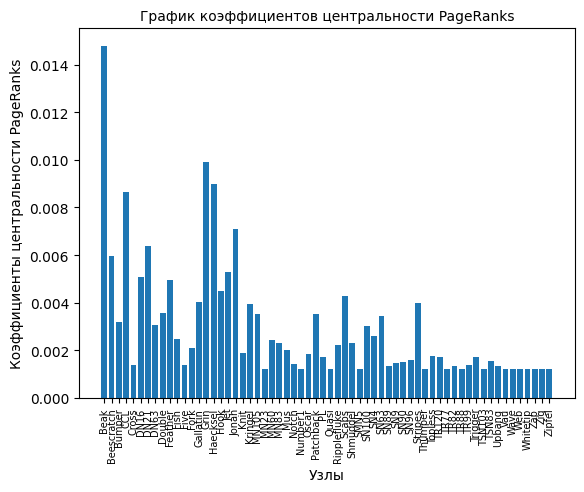

In [ ]:
# Строим график, чтобы визуализировать полученный результат

# Построение графика
plt.bar(names, res)
plt.xlabel('Узлы')
plt.ylabel('Коэффициенты центральности PageRanks', fontsize=10)
plt.title('График коэффициентов центральности PageRanks', fontsize=10)
plt.xticks(rotation=90, fontsize=7)  # Устанавливаем угол и размер шрифта
plt.show()

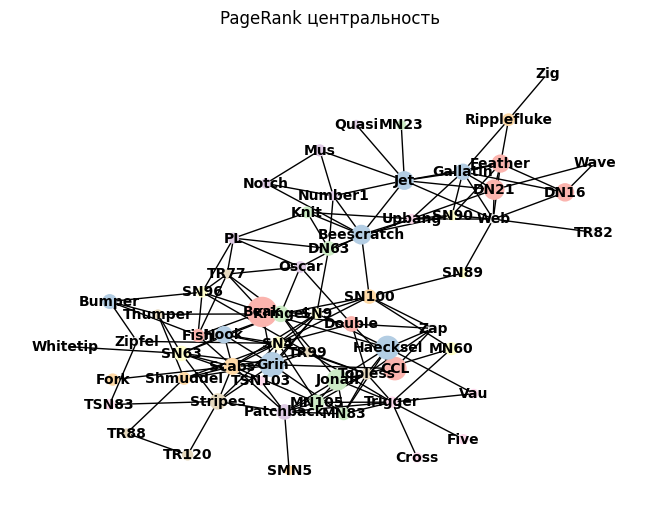

In [ ]:
# Рассчитываем веса вершин на основе PageRank центральности
node_weights = [res[node] for node in G.nodes()]

# Генерируем уникальные цвета для каждой вершины
colors = np.arange(len(G.nodes()))

# Рисуем граф, настраивая размер вершин, цвета и размещение
pos = nx.kamada_kawai_layout(G)  # Используем Kamada-Kawai для размещения вершин
nx.draw(G, pos, labels=node_names, with_labels=True, node_size=[w * 29599 for w in node_weights], node_color=colors, cmap=plt.get_cmap("Pastel1"), font_size=10, font_color='black', font_weight='bold')
plt.title("PageRank центральность")
plt.show()

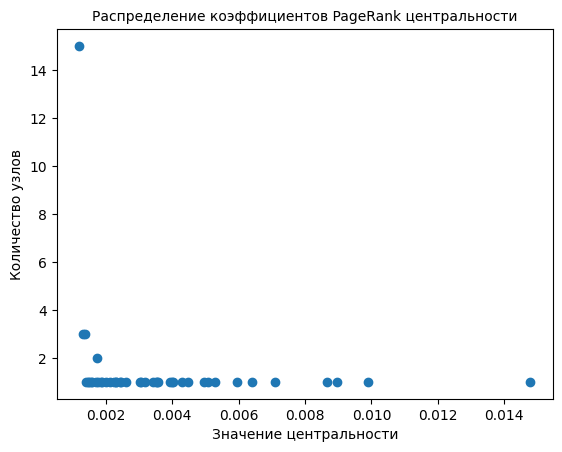

In [ ]:
# Строим график распределения для PageRank центральности
# Создаем гистограмму значений центральности
counter = Counter(res)
x = list(counter.keys())
y = list(counter.values())

plt.scatter(x, y)
plt.xlabel('Значение центральности')
plt.ylabel('Количество узлов')
plt.title('Распределение коэффициентов PageRank центральности', fontsize=10)
plt.show()